In [2]:
print("hej")

hej


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Intro till Pandas

In [81]:
data = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series = pd.Series(data=data)
print(series)

AI      25
NET     30
APP     27
Java    23
dtype: int64


In [82]:
#Extract values
print(series[0])

#Extract keys
print(series.keys())
print(series.keys()[-2])

25
Index(['AI', 'NET', 'APP', 'Java'], dtype='object')
APP


# DataFrame


In [83]:
df = pd.DataFrame(series)
print(df)

       0
AI    25
NET   30
APP   27
Java  23


In [84]:
df = pd.DataFrame(series, columns=("Number students",))
df

,Number students
AI,25
NET,30
APP,27
Java,23


In [85]:
languages = pd.Series(dict(AI = "Python", NET = "C#", APP = "Kotlin", Java = "Java"))
df = pd.DataFrame({"students":series, "Language":languages})
df

,students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,Java


## Data selection

In [86]:
df.students # Gets a Series with attribute-approch

AI      25
NET     30
APP     27
Java    23
Name: students, dtype: int64

In [87]:
df["students"] # gets a Series with dictonary-keys approach (__getitem__)


AI      25
NET     30
APP     27
Java    23
Name: students, dtype: int64

In [88]:
# Multi column
df[["Language", "students"]]

,Language,students
AI,Python,25
NET,C#,30
APP,Kotlin,27
Java,Java,23


In [89]:
# Wants to get all rows > 24 students
print(df["students"] > 24) # __gt__

# Masking
large_groups = df[df["students"] > 24] # Pics out all True rows

AI       True
NET      True
APP      True
Java    False
Name: students, dtype: bool


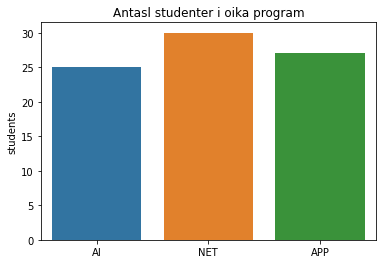

In [90]:
sns.barplot(data=large_groups, x=large_groups.index, y= "students")

plt.title("Antasl studenter i oika program");  #can also use seaborns methods for this

In [91]:
# Read Excel

calories = pd.read_excel("../Data/calories.xlsx")
calories.head(3)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ


In [92]:
calories.iloc[3:9]

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ


In [93]:
calories.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [94]:
calories.describe()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [95]:
calories["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [96]:
calories["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning
- convert str -> int
- change column names
- separate liquidus and solidus

In [97]:
calories = calories.rename(dict(Cals_per100grams = "Calories", per100grams="per100"), axis="columns")
calories.tail()


,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [107]:
calories["Calories"] = calories["Calories"].str[:-3].astype(int)
calories.head

AttributeError: Can only use .str accessor with string values!

In [109]:
solids = calories[calories["per100"] == "100g"]

In [112]:
liquids = calories[calories["per100"] == "100ml"]

In [117]:
solids_top_5 = solids.sort_values(by="Calories", ascending=False).head()

In [114]:
liquids.sort_values(by="Calories", ascending=False).head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


<AxesSubplot:xlabel='FoodItem', ylabel='Calories'>

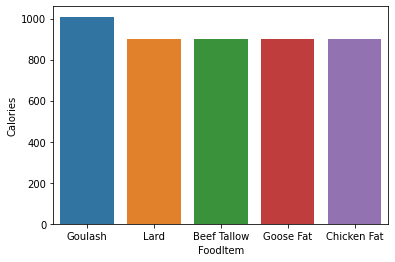

In [120]:
#fi, ax = plt.subplot(1,2, dpi=100, figsize=(12, 4))
sns.barplot(data= solids_top_5, x="FoodItem", y="Calories")